# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc = pd.read_csv('sinasc.csv')


In [3]:
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [ ]:
sinasc.info()

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
sinasc['Faixa_Lat'] = None

In [5]:
sinasc.loc[sinasc['munResLat']>(-10.5),'Faixa_Lat']='Acima'
sinasc.loc[sinasc['munResLat']<(-10.5),'Faixa_Lat']='Abaixo'

In [6]:
sinasc.groupby('Faixa_Lat')['QTDFILMORT'].agg(['sum','mean','min',max,'median','std','var'])

,sum,mean,min,max,median,std,var
Faixa_Lat,,,,,,,
Abaixo,3105.0,0.242521,0.0,28.0,0.0,0.599430,0.359317
Acima,3538.0,0.291770,0.0,9.0,0.0,0.627856,0.394204


In [7]:
sinasc.groupby('Faixa_Lat')['CONSULTAS'].agg(['sum','mean','min',max,'median','std','var'])

,sum,mean,min,max,median,std,var
Faixa_Lat,,,,,,,
Abaixo,48000,3.694297,1,9,4.0,0.643372,0.413928
Acima,48662,3.467436,1,9,4.0,0.888240,0.788970


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [8]:
sinasc['Faixa_Area'] = None

sinasc.loc[sinasc['munResArea']>(3000),'Faixa_Area']='Acima'

sinasc.loc[sinasc['munResArea']<(3000),'Faixa_Area']='Abaixo'

In [9]:
sinasc.groupby('Faixa_Area')['IDADEPAI'].agg(['sum','mean','min',max,'median','std','var'])

,sum,mean,min,max,median,std,var
Faixa_Area,,,,,,,
Abaixo,78074.0,31.092792,16.0,69.0,30.0,7.675474,58.912900
Acima,158424.0,31.094014,15.0,86.0,30.0,7.818364,61.126809


In [10]:
sinasc.groupby('Faixa_Area')['PESO'].agg(['sum','mean','min',max,'median','std','var'])

,sum,mean,min,max,median,std,var
Faixa_Area,,,,,,,
Abaixo,16796616,3218.359073,258,5720,3245.0,531.583103,282580.595074
Acima,70857126,3249.134538,292,5985,3280.0,547.716582,299993.453720


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [11]:
sinasc['Faixa_Alt']=None

In [12]:
sinasc.loc[sinasc['munResAlt']<=(100),'Faixa_Alt']='Até 100'

sinasc.loc[(sinasc['munResAlt']>100)&(sinasc['munResAlt']<=200),'Faixa_Alt']='Entre 100 a 200'
sinasc.loc[(sinasc['munResAlt']>200)&(sinasc['munResAlt']<=300),'Faixa_Alt']='Entre 200 a 300'
sinasc.loc[(sinasc['munResAlt']>300),'Faixa_Alt']='Maior que 300'

In [13]:
sinasc.groupby('Faixa_Alt')['QTDFILVIVO'].agg(['sum','mean','min',max,'median','std','var'])

,sum,mean,min,max,median,std,var
Faixa_Alt,,,,,,,
Até 100,9117.0,1.180806,0.0,12.0,1.0,1.239860,1.537253
Entre 100 a 200,11889.0,1.023414,0.0,14.0,1.0,1.160265,1.346215
Entre 200 a 300,3545.0,0.972832,0.0,30.0,1.0,1.101780,1.213920
Maior que 300,2275.0,0.920307,0.0,10.0,1.0,1.057876,1.119102


In [14]:
sinasc.groupby('Faixa_Alt')['QTDFILMORT'].agg(['sum','mean','min',max,'median','std','var'])

,sum,mean,min,max,median,std,var
Faixa_Alt,,,,,,,
Até 100,2309.0,0.309103,0.0,9.0,0.0,0.641043,0.410936
Entre 100 a 200,2860.0,0.251406,0.0,9.0,0.0,0.576993,0.332921
Entre 200 a 300,890.0,0.246196,0.0,4.0,0.0,0.549912,0.302403
Maior que 300,584.0,0.236629,0.0,28.0,0.0,0.760232,0.577952


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [15]:
sinasc['Reg_Imediata'] = None

imediatas={'Candeias do Jamari':'Porto Velho','Guajará-Mirim':'Porto Velho','Itapuã do Oeste':'Porto Velho',
           'Nova Mamoré':'Porto Velho','Porto Velho':'Porto Velho',
          'Alto Paraíso':'Ariquemes','Ariquemes':'Ariquemes','Buritis':'Ariquemes'
        ,'Cacaulândia':'Ariquemes','Campo Novo de Rondônia':'Ariquemes','Cujubim':'Ariquemes'
            ,'Monte Negro':'Ariquemes','Rio Crespo':'Ariquemes',
           'Governador Jorge Teixeira':'Jaru','Jaru':'Jaru'
            ,"Machadinho D'Oeste":'Jaru','Theobroma':'Jaru','Vale do Anari':'Jaru',
           "Alvorada D'Oeste":'Ji Parana','Costa Marques':'Ji Parana','Ji-Paraná':'Ji Parana'
            ,'Mirante da Serra':'Ji Parana','Nova União':'Ji Parana','Ouro Preto do Oeste':'Ji Parana'
            ,'Presidente Médici':'Ji Parana','São Francisco do Guaporé':'Ji Parana'
           ,'São Miguel do Guaporé':'Ji Parana','Seringueiras':'Ji Parana','Teixeirópolis':'Ji Parana',
           'Urupá':'Ji Parana','Vale do Paraíso':'Ji Parana',
           "Alta Floresta d'Oeste":'Cacoal','Alto Alegre dos Parecis':'Cacoal','Cacoal':'Cacoal'
            ,'Castanheiras':'Cacoal',"Espigão D'Oeste":'Cacoal','Ministro Andreazza':'Cacoal'
            ,"Nova Brasilândia D'Oeste":'Cacoal','Novo Horizonte do Oeste':'Cacoal',
            'Parecis':'Cacoal','Pimenta Bueno':'Cacoal','Primavera de Rondônia':'Cacoal'
            ,'Rolim de Moura':'Cacoal',"Santa Luzia D'Oeste":'Cacoal',"São Felipe D'Oeste":'Cacoal'
          }

In [16]:
df2 = sinasc.set_index('munResNome')

In [17]:
df3 = df2.groupby(imediatas)['IDADEMAE'].mean()

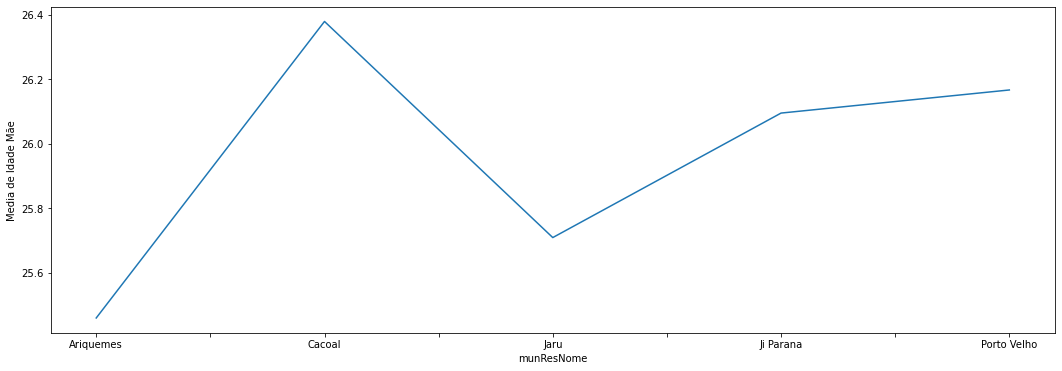

In [18]:
df3.plot(figsize=[18, 6])
plt.ylabel('Media de Idade Mãe');

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [19]:
import requests
from bs4 import BeautifulSoup

In [20]:
url='https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M'
table_class="wikitable sortable jquery-tablesorter"
resposta=requests.get(url)
print(resposta.status_code)

200


In [21]:
soup = BeautifulSoup(resposta.text, 'html.parser')
tabela=soup.find('table',{'class':"wikitable"})
df = pd.read_html(str(tabela))
df = pd.DataFrame(df[0])


In [22]:
df.head()

Posição         Município     Dados de 2010                    \
            Posição         Município     IDH municipal         IDH renda   
   IDH-M muito alto  IDH-M muito alto  IDH-M muito alto  IDH-M muito alto   
0  nenhum município  nenhum município  nenhum município  nenhum município   
1        IDH-M alto        IDH-M alto        IDH-M alto        IDH-M alto   
2                 1       Porto Velho             0.736             0.764   
3                 2           Vilhena             0.731             0.734   
4                 3            Cacoal             0.718             0.727   

                                       
    IDH longevidade      IDH educação  
   IDH-M muito alto  IDH-M muito alto  
0  nenhum município  nenhum município  
1        IDH-M alto        IDH-M alto  
2             0.819             0.638  
3             0.808             0.659  
4             0.821             0.620

In [23]:
df.drop(index=57,inplace=True)
df.drop(index=56,inplace=True)
df.drop(index=0,inplace=True)
df.reset_index(drop=True,inplace=True)
df.columns = df.columns.droplevel(2)
df.columns = df.columns.droplevel(0)
df['Tipo_IDH']=None

In [24]:
df.loc[(df['Posição']=='IDH-M alto'),'Posição']=0
df.loc[(df['Posição']=='IDH-M médio'),'Posição']=0
df.loc[(df['Posição']=='IDH-M baixo'),'Posição']=0

In [25]:
df.Posição = df.Posição.astype(int)

In [26]:
df.loc[(df['Posição']>=1)&(df['Posição']<=7),'Tipo_IDH']='Alto'
df.loc[(df['Posição']>7)&(df['Posição']<=43),'Tipo_IDH']='Medio'
df.loc[(df['Posição']>=44)&(df['Posição']<=52),'Tipo_IDH']='Baixo'

In [27]:
df.dropna(inplace=True)

In [28]:
df.groupby('Tipo_IDH')['Município'].count()

Tipo_IDH
Alto      7
Baixo     9
Medio    36
Name: Município, dtype: int64

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [29]:
url=' https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM'
table_class="wikitable sortable jquery-tablesorter"
resposta=requests.get(url)
print(resposta.status_code)

200


In [30]:
soup = BeautifulSoup(resposta.text, 'html.parser')
tabela=soup.find('table',{'class':"wikitable"})
df = pd.read_html(str(tabela))
df = pd.DataFrame(df[0])


In [31]:
df.head(50)

,Posição,Município,IFDM Consolidado (2013)
,Desenvolvimento alto,Desenvolvimento alto,Desenvolvimento alto
0,nenhum município,nenhum município,nenhum município
1,Desenvolvimento moderado,Desenvolvimento moderado,Desenvolvimento moderado
2,1º,Ariquemes,0.7746
3,2º,Vilhena,0.7465
4,3º,Pimenta Bueno,0.7383
5,4º,Porto Velho,0.7257
6,5º,Ji-Paraná,0.7117
7,6º,Cacoal,0.7111
8,7º,Santa Luzia d'Oeste,0.6850


In [32]:
df.drop(index=56,inplace=True)
df.drop(index=55,inplace=True)
df.drop(index=1,inplace=True)
df.drop(index=0,inplace=True)
df.reset_index(drop=True,inplace=True)
df.columns = df.columns.droplevel(1)
df['Tipo_Desenvolvimento']=None

In [33]:
df.loc[(df['Posição']=='Desenvolvimento regular'),'Posição']=0
df.loc[(df['Posição']=='Desenvolvimento moderado'),'Posição']=0

In [34]:
n=1
for item in df['Posição']:
    i = str(n)+'º'
    df['Posição'] = df['Posição'].replace(i,n)
    n = n+1

In [35]:
df.Posição = df.Posição.astype(int)

In [36]:
df.loc[(df['Posição']>=1)&(df['Posição']<=26),'Tipo_Desenvolvimento']='Moderado'
df.loc[(df['Posição']>26),'Tipo_Desenvolvimento']='Regular'


In [37]:
df.dropna(inplace=True)

In [38]:
df.groupby('Tipo_Desenvolvimento')['Município'].count()

Tipo_Desenvolvimento
Moderado    26
Regular     26
Name: Município, dtype: int64

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

 - Metade dos municipios do estado possuem um IFDM moderado.
 - As 5 cidades mais populosas possuem um IDH alto
 - A média de consultas nas regiões de alta e baixa latitude são parecidas o que é bem interessante visto que algumas dessas regiões são de acesso dificil.
 - A média de idade das mulheres nas cidades mais populosas é bem próxima.